<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



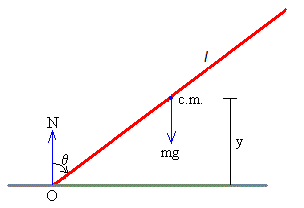


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [ ]:
import numpy as np
from scipy.integrate import odeint

# Constantes
L = 0.1  # longitud del lápiz en metros
g = 9.8  # aceleración de la gravedad en m/s²

# Función que define las ecuaciones diferenciales para el sistema
def ecuaciones(y, t):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = (2*g/L - omega**2 * np.cos(theta)) / (1/3 + np.sin(theta)**2) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Función para ajustar el vector de tiempo hasta que el lápiz toque el suelo
def ajuste_tiempo_vector(y0, max_time):
    t = np.linspace(0, max_time, 1000)
    sol = odeint(ecuaciones, y0, t)
    theta = sol[:, 0]

    # Encontrar el índice donde theta >= pi/2
    floor_contact_index = np.where(theta >= np.pi/2)[0][0] if np.any(theta >= np.pi/2) else -1

    if floor_contact_index != -1:
        t = t[:floor_contact_index+1]
        theta = theta[:floor_contact_index+1]
        y_cm = L/2 * np.cos(theta)  # posición del CM
        omega = sol[:, 1][:floor_contact_index+1]
    else:
        y_cm = L/2 * np.cos(theta)
        omega = sol[:, 1]

    return t, theta, y_cm, omega

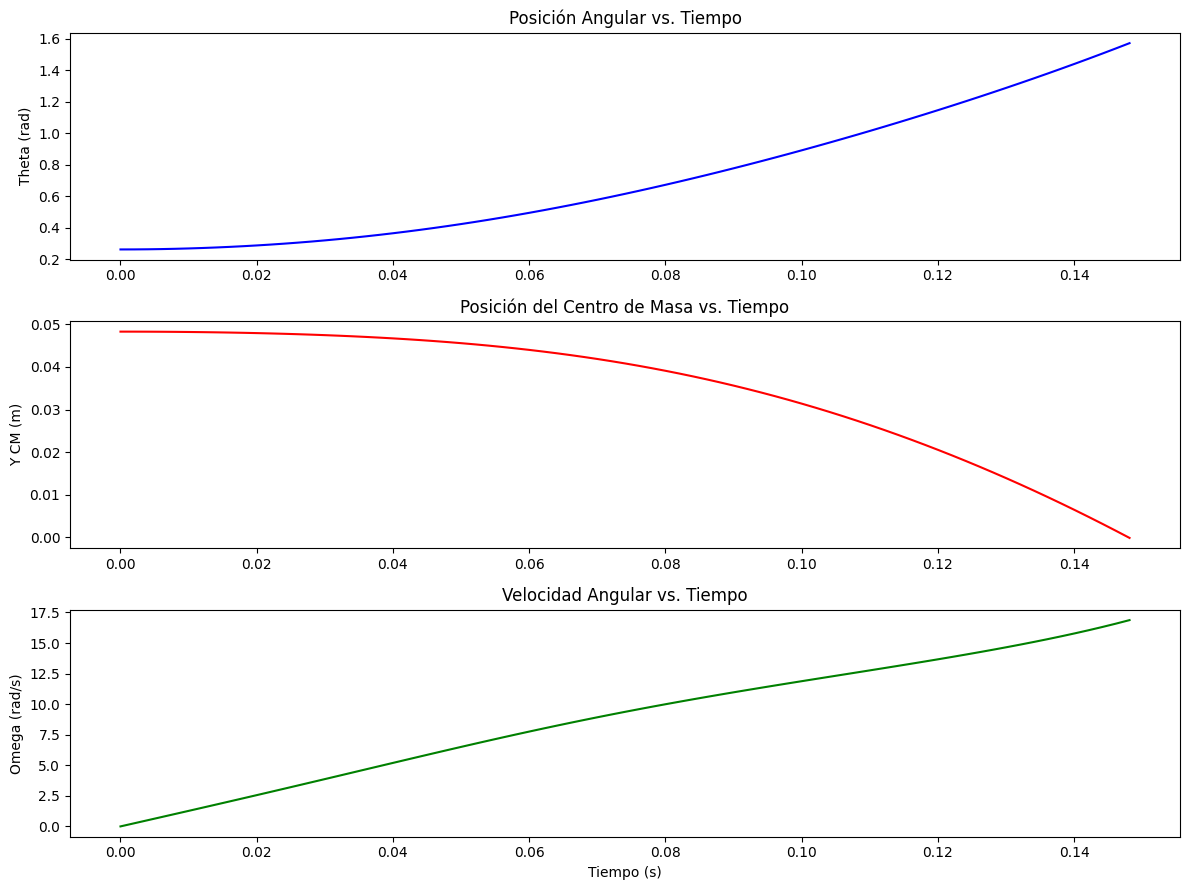

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar los resultados
def plot_results(t, theta, y_cm, omega):
    plt.figure(figsize=(12, 9))
    plt.subplot(3, 1, 1)
    plt.plot(t, theta, 'b')
    plt.title('Posición Angular vs. Tiempo')
    plt.ylabel('Theta (rad)')

    plt.subplot(3, 1, 2)
    plt.plot(t, y_cm, 'r')
    plt.title('Posición del Centro de Masa vs. Tiempo')
    plt.ylabel('Y CM (m)')

    plt.subplot(3, 1, 3)
    plt.plot(t, omega, 'g')
    plt.title('Velocidad Angular vs. Tiempo')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Omega (rad/s)')

    plt.tight_layout()
    plt.show()

# Llamada a la función con condiciones iniciales y máximo tiempo estimado
theta0 = np.pi/12  # ángulo inicial
omega0 = 0         # velocidad angular inicial
max_time = 2       # tiempo máximo inicial estimado
t, theta, y_cm, omega = ajuste_tiempo_vector([theta0, omega0], max_time)
plot_results(t, theta, y_cm, omega)


In [ ]:
# Determinar cuándo theta alcanza pi/2
theta_critico = np.pi / 2
indices_validos = np.where(results['theta'] >= theta_critico)[0]

if indices_validos.size > 0:
    tiempo_valido = results['time'][indices_validos[0]]
    print(f"El lápiz toca el suelo aproximadamente en t = {tiempo_valido:.5f} segundos.")
else:
    print("El lápiz no llega al suelo dentro del intervalo de tiempo simulado.")

El lápiz toca el suelo aproximadamente en t = 0.14815 segundos.


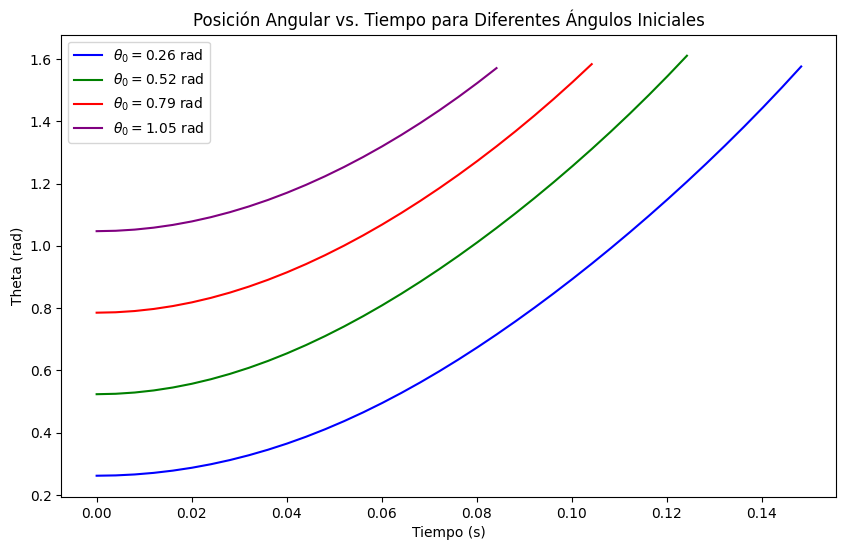

In [ ]:
import pandas as pd

initial_angles = [np.pi/12, np.pi/6, np.pi/4, np.pi/3]
colors = ['blue', 'green', 'red', 'purple']
max_time = 2  # tiempo máximo inicial estimado
t = np.linspace(0, max_time, 500)
data_frames = []

plt.figure(figsize=(10, 6))

for i, theta0 in enumerate(initial_angles):
    y0 = [theta0, 0]  # condiciones iniciales
    sol = odeint(ecuaciones, y0, t)
    theta = sol[:, 0]

    # Cortar los resultados cuando theta >= pi/2
    if np.any(theta >= np.pi/2):
        idx = np.where(theta >= np.pi/2)[0][0]
        t_plot = t[:idx + 1]
        theta_plot = theta[:idx + 1]
    else:
        t_plot = t
        theta_plot = theta

    df = pd.DataFrame({
        'Tiempo (s)': t_plot,
        f'Theta (rad) - Ángulo Inicial {theta0:.2f} rad': theta_plot
    })
    data_frames.append(df)

    plt.plot(t_plot, theta_plot, label=f'$\\theta_0 = {theta0:.2f}$ rad', color=colors[i])

plt.title('Posición Angular vs. Tiempo para Diferentes Ángulos Iniciales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.legend()
plt.show()


Raíz encontrada (Newton) para ángulo 0.26 rad: 0.1479832092639732
Raíz encontrada (Newton) para ángulo 0.52 rad: 0.12177872451923256
Raíz encontrada (Newton) para ángulo 0.79 rad: 0.1033211945205494
Raíz encontrada (Newton) para ángulo 1.05 rad: 0.08416004955292163


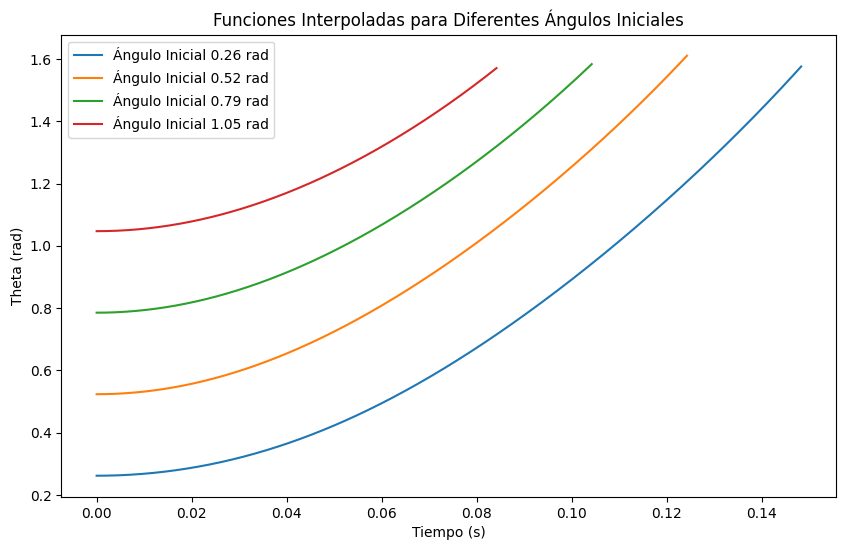

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.optimize import newton
import matplotlib.pyplot as plt

angles = [np.pi/12, np.pi/6, np.pi/4, np.pi/3]
cs_list = []
xs_list = []
roots_list = []

for df, angle in zip(data_frames, angles):
    cs = CubicSpline(df['Tiempo (s)'], df[f'Theta (rad) - Ángulo Inicial {angle:.2f} rad'])
    xs = np.linspace(np.min(df['Tiempo (s)']), np.max(df['Tiempo (s)']), 500)

    cs_list.append(cs)
    xs_list.append(xs)

    def f(x):
        return cs(x) - np.pi / 2

    def func_derivative(x):
        return cs.derivative()(x)


    a, b = np.min(df['Tiempo (s)']), np.max(df['Tiempo (s)'])
    try:
        x_root_newton = newton(f, x0=(a+b)/2, fprime=func_derivative)
        roots_list.append(x_root_newton)
        print(f"Raíz encontrada (Newton) para ángulo {angle:.2f} rad:", x_root_newton)
    except Exception as e:
        print(f"No se pudo encontrar la raíz para ángulo {angle:.2f} rad: {e}")

plt.figure(figsize=(10, 6))

for cs, xs, angle in zip(cs_list, xs_list, angles):
    plt.plot(xs, cs(xs), label=f'Ángulo Inicial {angle:.2f} rad')

plt.xlabel('Tiempo (s)')
plt.ylabel('Theta (rad)')
plt.title('Funciones Interpoladas para Diferentes Ángulos Iniciales')
plt.legend()
plt.show()


In [ ]:
from scipy.integrate import quad

def tiempo_caida_teorico(theta0, l=L, g=g):
    integral, _ = quad(lambda theta: np.sqrt((1/3 + np.sin(theta)**2) / (np.cos(theta0) - np.cos(theta))),
                       theta0, np.pi/2)
    return 0.5 * np.sqrt(l / g) * integral

raiz_teorica = []
for angulo in [np.pi/12, np.pi/6, np.pi/4, np.pi/3]:
    tiempo_teorico = tiempo_caida_teorico(angulo)
    raiz_teorica.append(tiempo_teorico)
    print(f"Tiempo teórico de caída para Theta0 = {angulo:.2f} rad: {tiempo_teorico:.5f} s")

Tiempo teórico de caída para Theta0 = 0.26 rad: 0.14798 s
Tiempo teórico de caída para Theta0 = 0.52 rad: 0.12178 s
Tiempo teórico de caída para Theta0 = 0.79 rad: 0.10332 s
Tiempo teórico de caída para Theta0 = 1.05 rad: 0.08416 s


In [ ]:
for i, (root, teoria) in enumerate(zip(roots_list, raiz_teorica)):
    error_absoluto = abs(root - teoria)

    error_relativo = 100 * error_absoluto / abs(teoria) if teoria != 0 else float('inf')  # Prevenir división por cero

    print(f"Par {i+1}:")
    print(f"  Raíz estimada: {root}")
    print(f"  Valor teórico: {teoria}")
    print(f"  Error Absoluto: {error_absoluto:.6f}")
    print(f"  Error Relativo (%): {error_relativo:.6f}")
    print()

Par 1:
  Raíz estimada: 0.1479832092639732
  Valor teórico: 0.1479832354352146
  Error Absoluto: 0.000000
  Error Relativo (%): 0.000018

Par 2:
  Raíz estimada: 0.12177872451923256
  Valor teórico: 0.12177877486181128
  Error Absoluto: 0.000000
  Error Relativo (%): 0.000041

Par 3:
  Raíz estimada: 0.1033211945205494
  Valor teórico: 0.10332124464084698
  Error Absoluto: 0.000000
  Error Relativo (%): 0.000049

Par 4:
  Raíz estimada: 0.08416004955292163
  Valor teórico: 0.08416005040768007
  Error Absoluto: 0.000000
  Error Relativo (%): 0.000001



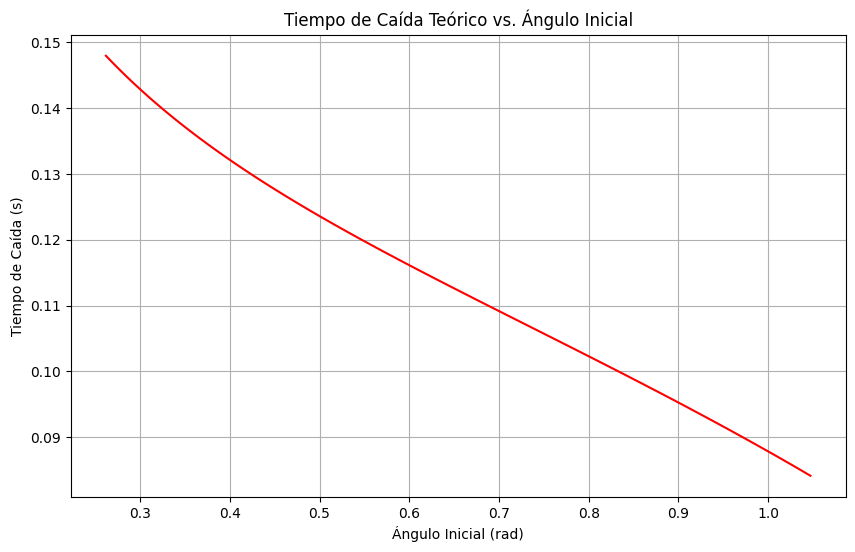

In [ ]:
def plot_tiempo_teorico(angulo):
    times = [tiempo_caida_teorico(angle) for angle in angles]
    plt.figure(figsize=(10, 6))
    plt.plot(angles, times, 'r-')
    plt.title('Tiempo de Caída Teórico vs. Ángulo Inicial')
    plt.xlabel('Ángulo Inicial (rad)')
    plt.ylabel('Tiempo de Caída (s)')
    plt.grid(True)
    plt.show()

angles = np.linspace(np.pi/12, np.pi/3, 100)
plot_tiempo_teorico(angles)


En general, podemos concluir que mientras mayor sea el angulo inicial entre el vector normal y el lapiz, menor será el tiempo requerido para que este caiga.